## **Assignment 3 DA5401**
### Name: Kowshik Arko Dey
### Roll No: ID25M803

#### This assignment is used to dive deeper into class imbalance, unsupervised learning(clustering) and how it can improve the performane of a supervised learning model

In [35]:
!pip install pandas seaborn matplotlib kaggle imblearn
# This code installs the necessary libraries for the completion of the assignment, if they are not already installed in the environment/local machine.

### Import necessary libraries

In [36]:
import numpy as np  #Numpy for faster numerical operations
import pandas as pd     #Pandas for data manipulation, cleaning and transformation
import seaborn as sns  #Seaborn for data visualization
import matplotlib.pyplot as plt #Matplotlib for plotting graphs
import os
import kaggle  #Open Datasets for downloading datasets from Kaggle and other sources
# To use kaggle API, you need to have a kaggle.json file in the ~/.kaggle/ directory with your API credentials.
from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import OneHotEncoder, LabelEncoder #To perform one hot encodings on the categorical features
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import StandardScaler #To perform feature scaling
from sklearn.decomposition import PCA #To perform Principal Component Analysis
from sklearn.model_selection import train_test_split #To split the dataset into training and testing sets
from sklearn.linear_model import LogisticRegression #To perform logistic regression
from sklearn.metrics import classification_report, accuracy_score #To evaluate the performance of the model
from scipy.stats import chi2_contingency    #To perform chi-square test
import json #To handle JSON data
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import logging
from collections import Counter
import math
from sklearn.neighbors import KernelDensity
logging.getLogger('matplotlib').propagate = False
logging.getLogger('matplotlib').setLevel(logging.WARNING)

## Part A: Data Exploration and Baseline Model

### Part A.1: Load and Analyze the Dataset

In [37]:
# Downloading the mushroom dataset from Kaggle and unzipping it if it is not already downloaded
if not os.path.exists('data/creditcard.csv'):
    !kaggle datasets download -d mlg-ulb/creditcardfraud -p data --unzip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0




  0%|          | 0.00/66.0M [00:00<?, ?B/s]
100%|██████████| 66.0M/66.0M [00:00<00:00, 1.00GB/s]


In [38]:
# A function to load the csv file into a pandas DataFrame. It can be used in later assignments also
def load_csv_file(file_path):
    """
    Func: This function loads a CSV file into a pandas DataFrame.
    Args: file_path (str): The path to the CSV file.
    Returns: pandas.DataFrame: The loaded DataFrame.
    """
    try:
        df = pd.read_csv(file_path)
        print(f"File '{file_path}' loaded successfully.")
        return df
    except FileNotFoundError:
        print(f"File '{file_path}' not found. Please check the path.")
        return None
    except pd.errors.ParserError:
        print(f"Error parsing the file '{file_path}'. Please check the file format.")
        return None

In [39]:
df_credits = load_csv_file('data/creditcard.csv')
print("The first few rows of the credits dataset\n")
df_credits.head()
df_credits.shape

File 'data/creditcard.csv' loaded successfully.
The first few rows of the credits dataset



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)

### The information about the data in the columns

In [40]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### See the summary statistics of each of column. My primary intention is to to see the mean and variance of the principal components

In [41]:
df_credits.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- It can be seen that from V1-28 are all standardized due to applying PCA on them. However the only two columns that are not standardized are the Time and Amount column. Without standardizing them, the model cannot converge. So the next step is to standardize them.

In [42]:
cols_to_standardize = ['Time','Amount']
scaler = StandardScaler()
df_credits[cols_to_standardize] = scaler.fit_transform(df_credits[cols_to_standardize])

### Part A.2 : Analyze Class Distribution

In [43]:
class_counts = df_credits['Class'].value_counts()
print("Class Distribution:\n", class_counts)

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


#### Visualize using a bar plot

C:\Users\deyko\AppData\Local\Temp\ipykernel_4992\2991354730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel", edgecolor="black")


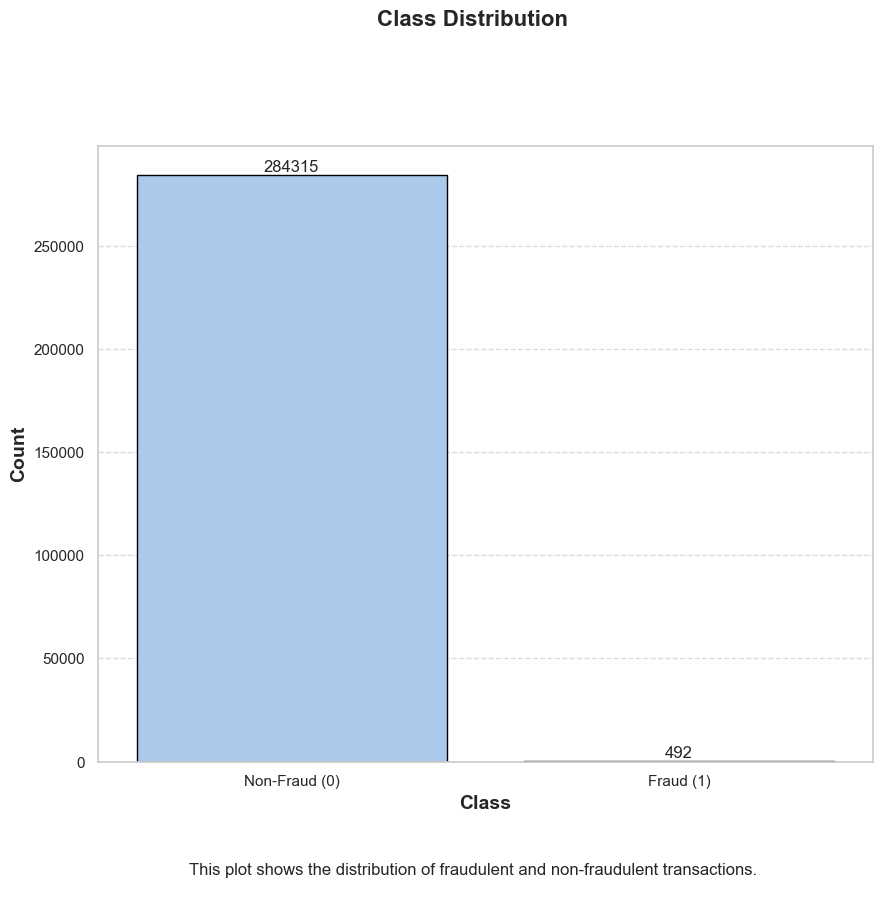

In [44]:
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10,8))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel", edgecolor="black")
plt.xticks([0,1], ["Non-Fraud (0)", "Fraud (1)"])
plt.suptitle("Class Distribution", fontsize=16, fontweight="bold", y=1.05)
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.xlabel("Class", fontsize=14, fontweight="bold")
for container in ax.containers:
    ax.bar_label(container)
plt.figtext(
    0.5, -0.05, 
    "This plot shows the distribution of fraudulent and non-fraudulent transactions.\n",
    wrap=True, ha="center", fontsize=12);
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show();


### The visualization can be made more intuitive by using a pie chart

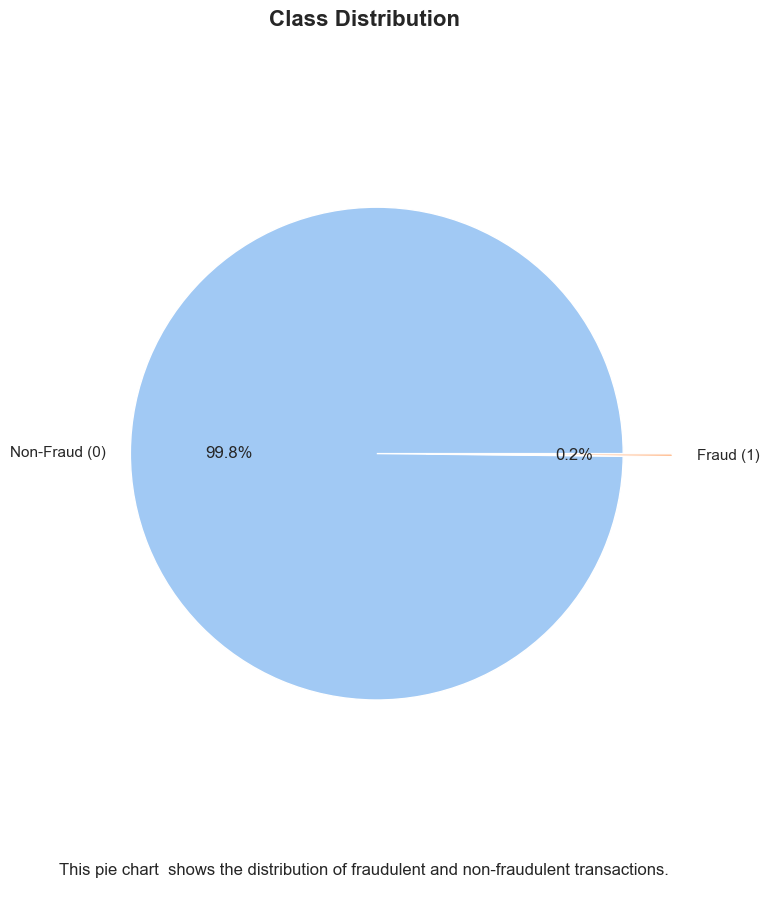

In [45]:
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10,8))
explode = [0, 0.2]
labels = ["Non-Fraud (0)", "Fraud (1)"]
ax = plt.pie(class_counts.values, labels = labels, autopct='%1.1f%%', colors = sns.color_palette("pastel"), explode = explode)
plt.suptitle("Class Distribution", fontsize=16, fontweight="bold", y=1.05)
#plt.ylabel("Count", fontsize=14, fontweight="bold")
#plt.xlabel("Class", fontsize=14, fontweight="bold")
plt.figtext(
    0.5, -0.05, 
    "This pie chart  shows the distribution of fraudulent and non-fraudulent transactions.\n",
    wrap=True, ha="center", fontsize=12);
plt.show();

In [46]:
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1 (major class:minor class)")


Imbalance ratio: 577.88:1 (major class:minor class)


### As it can be clearly seen, the target class distribution in the data is highly imbalanced. This is becausse 99.8% of the data represents non fraudulent cases, making it a highly major class while on the other hand, the more interesting fraud cases is only 0.2%. It can be also seen in the imbalance ration that for every minor target class data there is approximately 578 major target class data.

### Part A.3: Create a baseline logistic regression model

In [47]:

X = df_credits.drop(["Class"], axis=1)
y = df_credits["Class"]

reports = {}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

baseline_model = LogisticRegression(max_iter=1000, solver='lbfgs')
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

reports["Baseline"] = classification_report(y_test, y_pred_baseline, digits=4, output_dict=True)
print("=== Baseline Logistic Regression ===")
print(classification_report(y_test, y_pred_baseline, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline)*100:.2f}%")

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


=== Baseline Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     85295
           1     0.8585    0.6149    0.7165       148

    accuracy                         0.9992     85443
   macro avg     0.9289    0.8073    0.8581     85443
weighted avg     0.9991    0.9992    0.9991     85443

Accuracy: 99.92%


### Even though the model boasts a 99.92% accuracy, the model is very bad. The 99% accuracy can be achieved by predicting class 0 (non fraudulent) most of the time. The hidden story can be seen from the recall. The recall for class 1 shows 61% which means out of the 148 actual positives, the model only caught approximately 91 of them. This shows that the model is failing on the minority (fraudulent) class. Precision shows of the positive predictions 84% were correct which is still a decent score. The f1-score is a harmonic mean beterrn recall and precision which is far behind the overall accuracy highlighting the imbalance problem.

## Part B: Resampling Approaches

### Part B.1: Naive Oversampling (SMOTE) 

In [48]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

### Visualize the effect of SMOTE on class Imabalance

C:\Users\deyko\AppData\Local\Temp\ipykernel_4992\568493806.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()),
C:\Users\deyko\AppData\Local\Temp\ipykernel_4992\568493806.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()),


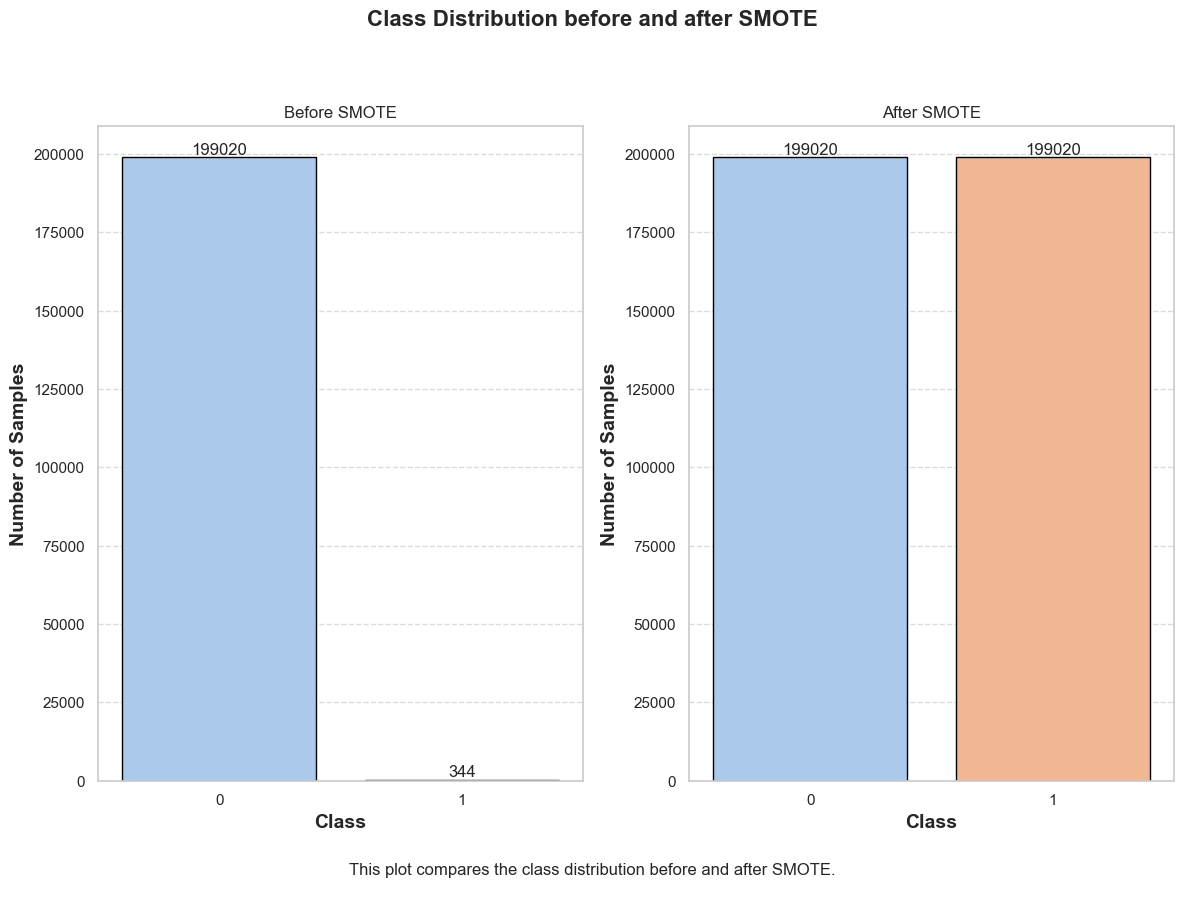

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
def plot_dist(y, title, ax):
    counts = Counter(y)
    sns.barplot(x=list(counts.keys()), y=list(counts.values()),
                ax=ax, palette="pastel", edgecolor="black")
    ax.set_title(title)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_xlabel("Class", fontsize=14, fontweight="bold")
    ax.set_ylabel("Number of Samples", fontsize=14, fontweight="bold")
    for i, v in enumerate(counts.values()):
        ax.text(i, v + 1, str(v), ha='center', va='bottom')

plot_dist(y_train,    "Before SMOTE", axes[0])
plot_dist(y_train_sm, "After SMOTE",  axes[1])
plt.suptitle("Class Distribution before and after SMOTE", fontsize=16, fontweight="bold", y=1.05)
plt.xlabel("Class", fontsize=14, fontweight="bold")
plt.ylabel("Number of Samples", fontsize=14, fontweight="bold")
plt.figtext(
    0.5, -0.05, 
    "This plot compares the class distribution before and after SMOTE.\n",
    wrap=True, ha="center", fontsize=12);
plt.tight_layout();
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show();

### Now Run the SMOTE model

In [50]:
smote_model = LogisticRegression(max_iter=1000, solver='lbfgs')
smote_model.fit(X_train_sm, y_train_sm)
y_pred_sm = smote_model.predict(X_test)
reports["SMOTE"] = classification_report(y_test, y_pred_sm, digits=4, output_dict=True)
print("=== SMOTE Logistic Regression ===")
print(classification_report(y_test, y_pred_sm, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_sm)*100:.2f}%")

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


=== SMOTE Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9998    0.9775    0.9885     85295
           1     0.0634    0.8784    0.1183       148

    accuracy                         0.9773     85443
   macro avg     0.5316    0.9279    0.5534     85443
weighted avg     0.9982    0.9773    0.9870     85443

Accuracy: 97.73%


### SMOTE works by synthesizing new samples from the minority class. This is done by interpolating a new synthetic point between two nearest neighbors of the minority class. Even though it works well with the logistic regression problem, SMOTE amplifies noise. This means that if the minority class contains noisy samples, SMOTE will interpolate around them and create more noisy synthetic samples. In addition if the minority class is multimodal and doesnot form proper clusters, SMOTE can create synthetic points which dont even match the true distribution.

### Part B.2 : Clustering Based Oversampling (CBO)

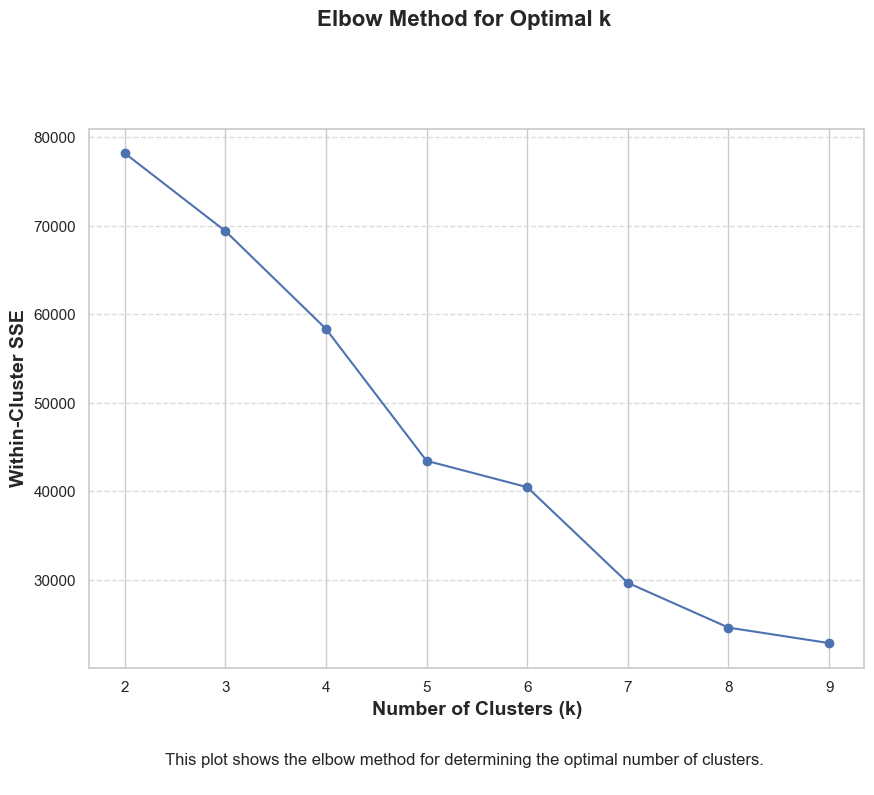

In [51]:
# Extract minority samples from training data
minority_X = X_train[y_train == 1]
# Calculate the inertia for different values of k
inertia = []    # list to store inertia values
K_range = range(2, 10)  # range of values for k (2 to 9)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(minority_X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,7))
plt.plot(K_range, inertia, marker='o')
plt.suptitle("Elbow Method for Optimal k", fontsize=16, fontweight="bold", y=1.05)
plt.xlabel("Number of Clusters (k)", fontsize=14, fontweight="bold")
plt.ylabel("Within-Cluster SSE", fontsize=14, fontweight="bold")
plt.figtext(
    0.5, -0.05, 
    "This plot shows the elbow method for determining the optimal number of clusters.\n",
    wrap=True, ha="center", fontsize=12);
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show();


In [52]:
# Let's choose k = 5 (from the elbow method plot)
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters = kmeans.fit_predict(minority_X)
# Add the cluster labels to the minority data
minority_clustered = minority_X.copy()
minority_clustered["Cluster"] = clusters
# Get the count of samples in each cluster
cluster_counts = minority_clustered["Cluster"].value_counts() # number of samples in each cluster
max_count = cluster_counts.max()  # target size for balancing
balanced_minority = []  # list to store balanced minority data
for c in cluster_counts.index:
    cluster_data = minority_clustered[minority_clustered["Cluster"] == c].drop("Cluster", axis=1)
    oversampled = cluster_data.sample(max_count, replace=True, random_state=42)     # oversampling
    balanced_minority.append(oversampled)

balanced_minority = pd.concat(balanced_minority, axis=0) # concatenate the oversampled data
majority_X = X_train[y_train == 0]
# Concatenate the oversampled minority data with the majority data
X_train_cbo = pd.concat([majority_X, balanced_minority], axis=0)
y_train_cbo = np.array([0]*len(majority_X) + [1]*len(balanced_minority))

### Visualize the effect of CBO

C:\Users\deyko\AppData\Local\Temp\ipykernel_4992\654714101.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()),
C:\Users\deyko\AppData\Local\Temp\ipykernel_4992\654714101.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()),


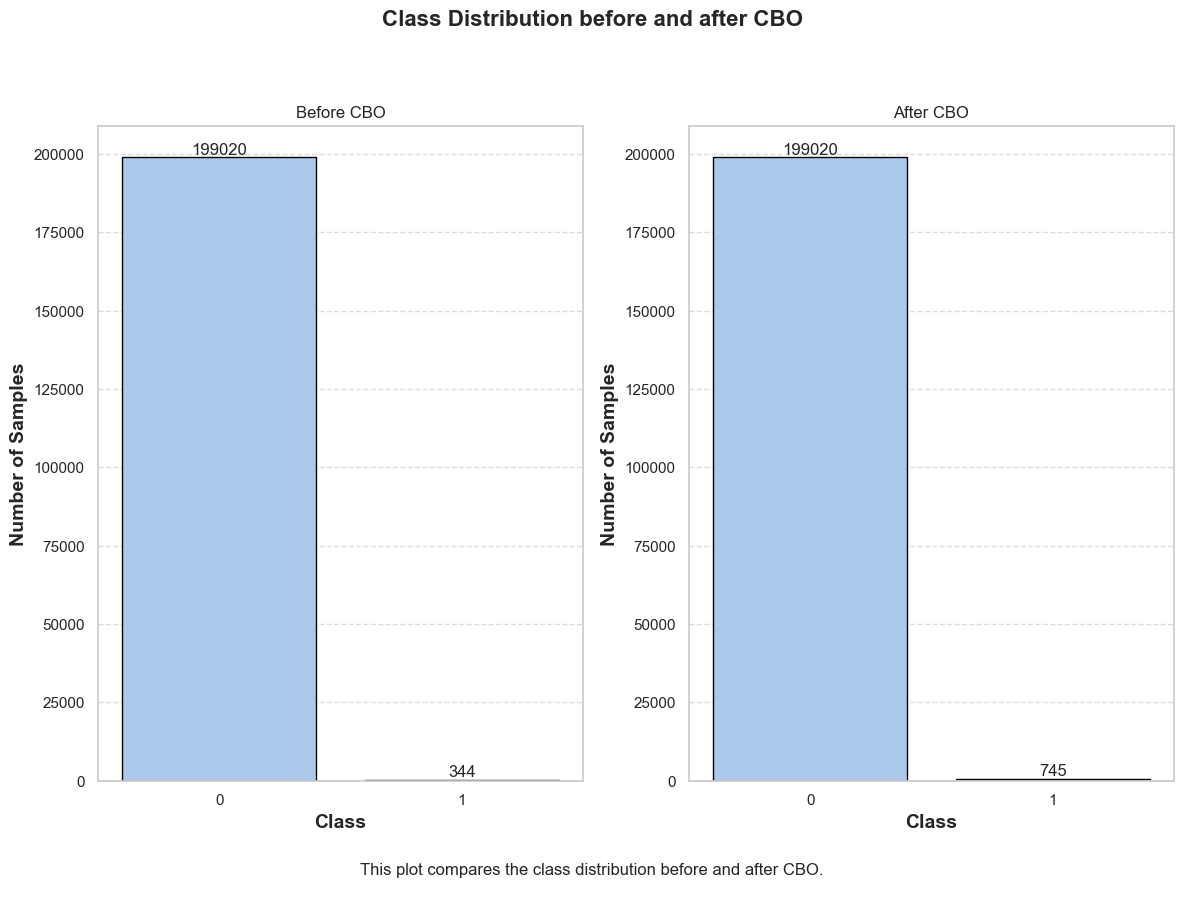

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
def plot_dist(y, title, ax):
    counts = Counter(y)
    sns.barplot(x=list(counts.keys()), y=list(counts.values()),
                ax=ax, palette="pastel", edgecolor="black", linewidth=1)
    ax.set_title(title)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_xlabel("Class", fontsize=14, fontweight="bold")
    ax.set_ylabel("Number of Samples", fontsize=14, fontweight="bold")
    for i, v in enumerate(counts.values()):
        ax.text(i, v + 1, str(v), ha='center', va='bottom')

plot_dist(y_train,    "Before CBO", axes[0])
plot_dist(y_train_cbo,"After CBO",  axes[1])

plt.suptitle("Class Distribution before and after CBO", fontsize=16, fontweight="bold", y=1.05)
plt.xlabel("Class", fontsize=14, fontweight="bold")
plt.ylabel("Number of Samples", fontsize=14, fontweight="bold")
plt.figtext(
    0.5, -0.05, 
    "This plot compares the class distribution before and after CBO.\n",
    wrap=True, ha="center", fontsize=12);
plt.tight_layout()
plt.show();

### Now run the SMOTE model

In [54]:
cbo_model = LogisticRegression(max_iter=1000, solver='lbfgs')
cbo_model.fit(X_train_cbo, y_train_cbo)
y_pred_cbo = cbo_model.predict(X_test)
reports["CBO"] = classification_report(y_test, y_pred_cbo, digits=4, output_dict=True)
print("=== Logistic Regression with Clustering-Based Oversampling (CBO) ===")
print(classification_report(y_test, y_pred_cbo, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_cbo)*100:.2f}%")

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


=== Logistic Regression with Clustering-Based Oversampling (CBO) ===
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     85295
           1     0.8378    0.6284    0.7181       148

    accuracy                         0.9991     85443
   macro avg     0.9186    0.8141    0.8589     85443
weighted avg     0.9991    0.9991    0.9991     85443

Accuracy: 99.91%


### As it was with the case of SMOTE, the minority class can exhibit multimodal distribution and interpolation between them creates uunreliable results. This is where clustering can help as it can identify the different sub-groups (modes) in the distribution. The core idea behind CBO is that each cluster creates a fraudulent subtype and by oversampling each fraudulent subtype is presented equally in the dataset so that the model can learn from all types of fraudulent subtypes. This is done by oversampling each subgroup with repetition untill it matches the count of the major subgroup so that everyone is represented equally.

### Part B.3: Clustering Based Undersampling (CBU)

In [55]:
cluster = ClusterCentroids(random_state=42)
X_train_cc, y_train_cc = cluster.fit_resample(X_train, y_train)

### Visualize the effect of CBU

C:\Users\deyko\AppData\Local\Temp\ipykernel_4992\1855756208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()),
C:\Users\deyko\AppData\Local\Temp\ipykernel_4992\1855756208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()),


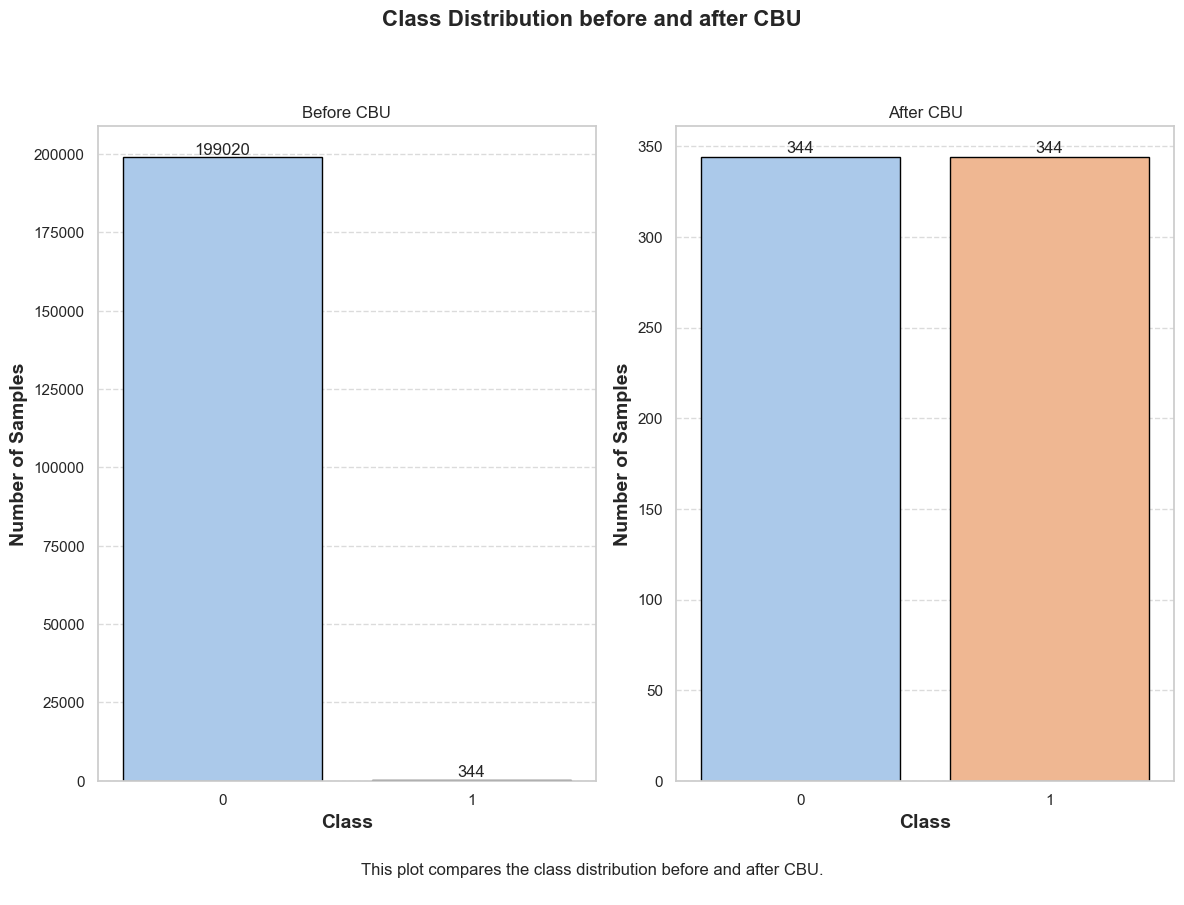

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
def plot_dist(y, title, ax):
    counts = Counter(y)
    sns.barplot(x=list(counts.keys()), y=list(counts.values()),
                ax=ax, palette="pastel", edgecolor="black", linewidth=1)
    ax.set_title(title)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_xlabel("Class", fontsize=14, fontweight="bold")
    ax.set_ylabel("Number of Samples", fontsize=14, fontweight="bold")
    for i, v in enumerate(counts.values()):
        ax.text(i, v + 1, str(v), ha='center', va='bottom')

plot_dist(y_train,   "Before CBU", axes[0])
plot_dist(y_train_cc,"After CBU",  axes[1])
plt.suptitle("Class Distribution before and after CBU", fontsize=16, fontweight="bold", y=1.05)
plt.xlabel("Class", fontsize=14, fontweight="bold")
plt.ylabel("Number of Samples", fontsize=14, fontweight="bold")
plt.figtext(
    0.5, -0.05, 
    "This plot compares the class distribution before and after CBU.\n",
    wrap=True, ha="center", fontsize=12);
plt.tight_layout()
plt.show();

### Now run the CBU model

In [57]:
cc_model = LogisticRegression(max_iter=2000, solver='lbfgs')
cc_model.fit(X_train_cc, y_train_cc)
y_pred_cc = cc_model.predict(X_test)
reports["CC"] = classification_report(y_test, y_pred_cc, digits=4, output_dict=True)
print("=== Cluster Centroids Logistic Regression ===")
print(classification_report(y_test, y_pred_cc, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_cc)*100:.2f}%")

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


=== Cluster Centroids Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9998    0.9622    0.9806     85295
           1     0.0382    0.8649    0.0731       148

    accuracy                         0.9620     85443
   macro avg     0.5190    0.9135    0.5269     85443
weighted avg     0.9981    0.9620    0.9790     85443

Accuracy: 96.20%


### Looking at the other point of view. We can also reduce the imbalance of the dataset by undersampling from the majority class. However random undersampling may cause to lose critical data points and lose information. Analogy to CBO, we can use CBU to create clusters from the majority class and then uncersample proptionally from each of  the subggroup found in the clustering method. Combined the reduced subgroups into a new dataset which undersamples and also respects the diversity and integrity of the majority class

## Part C: Model Comparison and Analysis

### Part C.1,C.2: Train and Evaluate Models

### **Baseline Logistic Regression**

=== Baseline Logistic Regression ===
                
                precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     85295
           1     0.8585    0.6149    0.7165       148

    accuracy                         0.9992     85443
    macro avg     0.9289    0.8073    0.8581     85443
    weighted avg     0.9991    0.9992    0.9991     85443

    Accuracy: 99.92%
### Even though the model boasts a 99.92% accuracy, the model is very bad. The 99% accuracy can be achieved by predicting class 0 (non fraudulent) most of the time. The hidden story can be seen from the recall. The recall for class 1 shows 61% which means out of the 148 actual positives, the model only caught approximately 91 of them. This shows that the model is failing on the minority (fraudulent) class. Precision shows of the positive predictions 84% were correct which is still a decent score. The f1-score is a harmonic mean beterrn recall and precision which is far behind the overall accuracy highlighting the imbalance problem.

### **SMOTE Logistic Regression**



=== SMOTE Logistic Regression ===

                precision    recall  f1-score   support

           0     0.9998    0.9775    0.9885     85295
           1     0.0634    0.8784    0.1183       148

    accuracy                         0.9773     85443
    macro avg     0.5316    0.9279    0.5534     85443
    weighted avg     0.9982    0.9773    0.9870     85443

    Accuracy: 97.73%

### After applying SMOTE to the minority class, the recall jumped to 87% from 61%. This means that the model can now detect most of the fraud cases. This shows that the model is now no longer dominated by the majority class. However, due to extreme and incorrect interpolation done by SMOTE the precision has collapsed to only 6%. This shows that SMOTE is forcing the model to see fraudulent cases even in non fradulent regions. As a result even the F1 score collapsed which shows SMOTE traded precision for recall. The accuracy still remains approximately 97% as the number of fraudulent cases is very low

### **CBO Logistic Regression**

=== Logistic Regression with Clustering-Based Oversampling (CBO) ===

                precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     85295
           1     0.8378    0.6284    0.7181       148

    accuracy                         0.9991     85443
    macro avg     0.9186    0.8141    0.8589     85443
    weighted avg     0.9991    0.9991    0.9991     85443

    Accuracy: 99.91%

### However very good results are achieved while performing Logistic Regression with CBU. The recall has barely increased from 61% to 62% which shows that the model is getting better at recognizing the minority class. In addition, although the precision decreased slightly compared to the baseline model (83%), it is a drastic improvement compared to the naive SMOTE model. This is also reflected by the F1 score which is the best balance yet (including baseline) between recall and precision for the fraudulent class. CBO balances fraud detection and false alarm rate, making it the most effective resampling method tested so far.


### **CBU Logistic Regression**

=== Cluster Centroids Logistic Regression ===

                precision    recall  f1-score   support

           0     0.9998    0.9622    0.9806     85295
           1     0.0382    0.8649    0.0731       148

    accuracy                         0.9620     85443
    macro avg     0.5190    0.9135    0.5269     85443
    weighted avg     0.9981    0.9620    0.9790     85443

    Accuracy: 96.20%


### After CBU, the logistic regression model treats fraudulent and non-fraudulent classes in a more balanced way. As a result, it produces the best recall amongst all the current models (86.49%). However it also produces the worst possible precision (3.82%) for fraudulent cases. This means that the model is labelling large number of class 0 cases as class 1. As a result it produces the lowest F-1 score too. In addition accuracy also reduced to 96.20%. This is due to the case of huge number of false positives. So the model is handling the majority class very poorly.

## Part C.2: **We visualize the score comparison using bar plots**

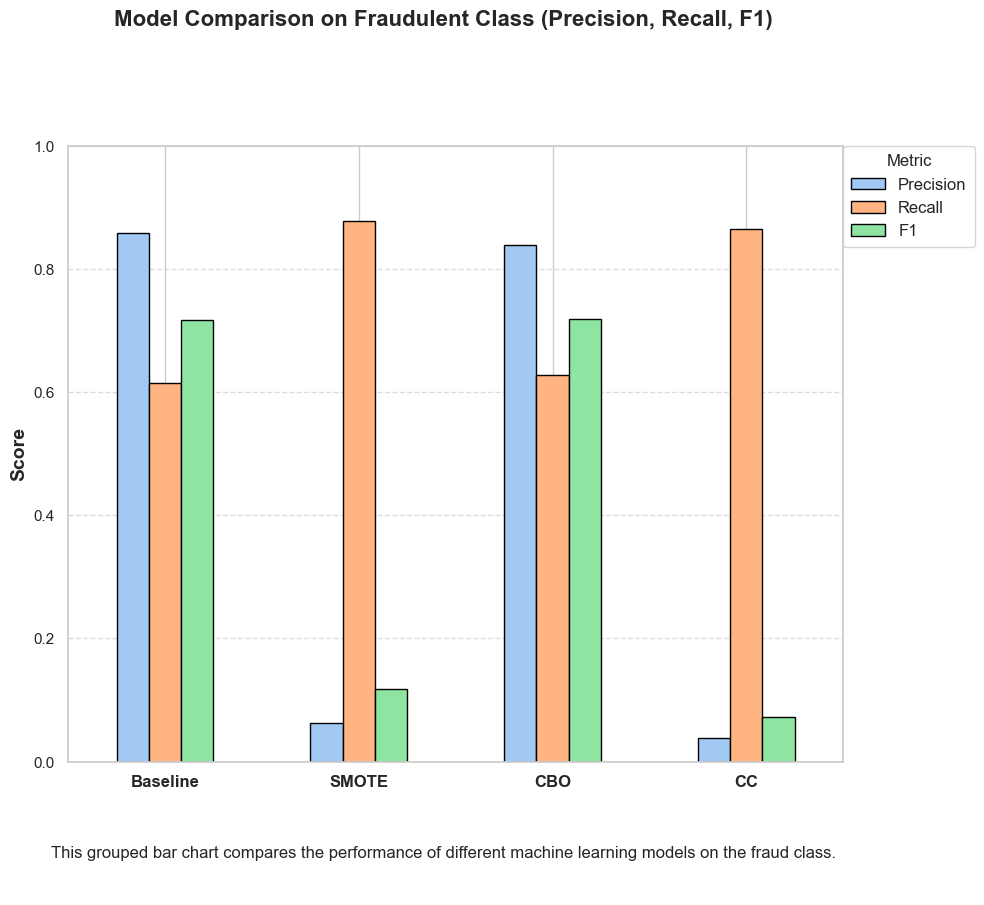

In [58]:
results = {}    # dictionary to store results
for model_name, report in reports.items():
    #print(report)
    fraud_metrics = report["1"]   # get metrics for class 1
    results[model_name] = {
        "Precision": fraud_metrics["precision"],
        "Recall": fraud_metrics["recall"],
        "F1": fraud_metrics["f1-score"]
    }
# Convert to DataFrame
df_results = pd.DataFrame(results).T
# Plot grouped bar chart
ax = df_results.plot(kind="bar", figsize=(10,8), color=sns.color_palette("pastel"), edgecolor="black", linewidth=1 )    # plot grouped bar chart
plt.suptitle("Model Comparison on Fraudulent Class (Precision, Recall, F1)", fontsize=16, fontweight="bold", y=1.05)
plt.ylabel("Score", fontsize=14, fontweight="bold")
plt.xticks(rotation=0, fontsize=12, ha="center", fontweight="bold")
plt.ylim(0, 1)
plt.legend(title="Metric", bbox_to_anchor=(1, 1), loc="upper left", fontsize=12, borderaxespad=0, borderpad=0.5)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.figtext(
    0.5, -0.05, 
    "This grouped bar chart compares the performance of different machine learning models on the fraud class.\n\n",
    wrap=True, ha="center", fontsize=12);
plt.show();

## Part C.3: Conclusions and Recommendations

### Benefits and Drawbacks of Each Resampling Method
- **Baseline (Imbalanced Data)**  
  1. **Benefit:** Very high precision which means that if it detects class 1, it detects correctly  
  2. **Drawback:** Very low recall due to missing most of the fraudulent 
  3. **Overall:** Clear case of data imbalance. 

- **SMOTE (Naive Oversampling)**  
  1. **Benefit:** Strong improvement in recall (87%) — detects most frauds.  
  2. **Drawback:** Precision collapses due to misleading interpolations
  3. **Overall:** Overcompensates for imbalance by generating synthetic samples in regions without real data, leading to excessive false positives.  

- **CBO (Clustering-Based Oversampling)**  
  1. **Benefit:** Best balance between recall and precision
  2. **Drawback:** Recall is lower than SMOTE/CBU, but trade off is required for improvement in precision
  3. **Overall:** Best balance between detecting frauds and minimizing false alarms.  

- **CBU (Clustering-Based Undersampling / Cluster Centroids)**  
  1. **Benefit:** Very high recall (88%), almost all frauds are detected.  
  2. **Drawback:** Highest number of false alarms amongst all models
  3. **Overall:** Prioritizes fraud detection at the cost of false alarms


### How Clustering-Based Approaches Improve on SMOTE
SMOTE generates synthetic minority samples without considering the internal diversity or structure of the fraudulent class, which can lead to unrealistic samples and noisy amplification. Clustering-Based Oversampling (CBO) addresses this by first clustering the minority class into subgroups (fraud subtypes) and then oversampling within each cluster, ensuring diversity and avoiding noisy interpolations. Clustering-Based Undersampling (CBU), on the other hand, reduces the size of the majority class by clustering and selecting representative samples, thereby preserving the diversity of normal transactions instead of discarding them randomly and losing information


### Final Recommendation
Among all methods, Clustering-Based Oversampling (CBO) performed the best overall, achieving the highest F1-score (72%) and offering the best balance between precision and recall. It improved recall compared to the baseline model without drastically reducing precision as seen in SMOTE and CBU, making it the most practical approach for fraud detection since it captures significantly more fraud cases while keeping false positives low at the same time.

